# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [6]:
# insert your code here
da['DMDMARTLx']=da.DMDMARTL.replace({1.0:'Married',5.0:'Nev Married',3.0:'Divorced',6.0:'Liv_w_part',2.0:'Widowed',
                                    4.0:'Separated',77.0:'Refused',99.0:"Don't know"}).fillna("Missing")
da.DMDMARTLx.value_counts()

Married        2780
Nev Married    1004
Divorced        579
Liv_w_part      527
Widowed         396
Missing         261
Separated       186
Refused           2
Name: DMDMARTLx, dtype: int64

In [8]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
da[da['RIAGENDRx']=='Male'].DMDMARTLx.value_counts()/da[da['RIAGENDRx']=='Male'].shape[0]

Married        0.535339
Nev Married    0.175426
Liv_w_part     0.096049
Divorced       0.083001
Missing        0.048931
Widowed        0.036245
Separated      0.024647
Refused        0.000362
Name: DMDMARTLx, dtype: float64

In [9]:
da[da['RIAGENDRx']=='Female'].DMDMARTLx.value_counts()/da[da['RIAGENDRx']=='Female'].shape[0]

Married        0.437836
Nev Married    0.174731
Divorced       0.117608
Widowed        0.099462
Liv_w_part     0.088038
Missing        0.042339
Separated      0.039651
Refused        0.000336
Name: DMDMARTLx, dtype: float64

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

In [9]:
dx=da.groupby(["DMDMARTLx"])['RIAGENDRx'].value_counts().unstack()
dx=dx.apply(lambda x:x/x.sum(),axis=0)
print(dx.to_string(float_format="%.4f"))

RIAGENDRx    Female   Male
DMDMARTLx                 
Divorced     0.1176 0.0830
Liv_w_part   0.0880 0.0960
Married      0.4378 0.5353
Missing      0.0423 0.0489
Nev Married  0.1747 0.1754
Refused      0.0003 0.0004
Separated    0.0397 0.0246
Widowed      0.0995 0.0362


__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

In [12]:
da['agegrp']=pd.cut(da.RIDAGEYR,[30,40])
da[da['RIAGENDRx']=='Female'].DMDMARTLx.value_counts()/da['DMDMARTLx'].shape[0]

Married        0.227201
Nev Married    0.090671
Divorced       0.061029
Widowed        0.051613
Liv_w_part     0.045684
Missing        0.021970
Separated      0.020575
Refused        0.000174
Name: DMDMARTLx, dtype: float64

In [13]:
da[(da.RIAGENDRx == "Female") & (da.agegrp == pd.Interval(30,40))].DMDMARTLx.value_counts()/da["DMDMARTLx"].shape[0]

Married        0.044987
Nev Married    0.016914
Liv_w_part     0.009939
Divorced       0.007498
Separated      0.002964
Widowed        0.000349
Name: DMDMARTLx, dtype: float64

__Q1c.__ Repeat part b for the men.

In [14]:
da[(da.RIAGENDRx=="Male")&(da.agegrp==pd.Interval(30,40))].DMDMARTLx.value_counts()/da['DMDMARTLx'].shape[0]

Married        0.044987
Nev Married    0.015519
Liv_w_part     0.012554
Divorced       0.004185
Separated      0.002092
Widowed        0.000349
Refused        0.000174
Name: DMDMARTLx, dtype: float64

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [22]:
# insert your code here
x=da[da.RIAGENDRx=='Female']
#x=x.loc[~da.DMDMARTLx.isin(["Don't Know","Missing"]),:]
x['agegrp2']=pd.cut(da.RIDAGEYR,[10,20,30,40,50,60,70,80])
dx=x.groupby(['agegrp2'])['DMDMARTLx'].value_counts().unstack()
dx=dx.apply(lambda y:y/y.sum(),axis=0)
print(dx.to_string(float_format="%.2f"))

DMDMARTLx  Divorced  Liv_w_part  Married  Missing  Nev Married  Refused  Separated  Widowed
agegrp2                                                                                    
(10, 20]        NaN        0.03     0.00     1.00         0.06      NaN        NaN      NaN
(20, 30]       0.03        0.40     0.12      NaN         0.44      NaN       0.09      NaN
(30, 40]       0.12        0.22     0.20      NaN         0.19      NaN       0.14     0.01
(40, 50]       0.20        0.14     0.22      NaN         0.12      NaN       0.28     0.04
(50, 60]       0.24        0.12     0.20      NaN         0.08     1.00       0.23     0.09
(60, 70]       0.24        0.07     0.16      NaN         0.07      NaN       0.19     0.22
(70, 80]       0.17        0.01     0.10      NaN         0.04      NaN       0.07     0.64


In [24]:
da['agegrp']=pd.cut(da.RIDAGEYR,[10,20,30,40,50,60,70,80])
(da[da['RIAGENDRx']=='Female'].groupby(['agegrp','DMDMARTLx']).size()/da[da['RIAGENDRx']=='Female'].groupby(['agegrp']).size()).unstack()

DMDMARTLx,Divorced,Liv_w_part,Married,Missing,Nev Married,Refused,Separated,Widowed
agegrp,,,,,,,,
"(10, 20]",NaN,0.048485,0.006061,0.763636,0.181818,NaN,NaN,NaN
"(20, 30]",0.021401,0.206226,0.305447,NaN,0.445525,NaN,0.021401,NaN
"(30, 40]",0.090717,0.120253,0.544304,NaN,0.204641,NaN,0.035865,0.004219
"(40, 50]",0.137450,0.073705,0.573705,NaN,0.125498,NaN,0.065737,0.023904
"(50, 60]",0.176596,0.068085,0.546809,NaN,0.089362,0.002128,0.057447,0.059574
"(60, 70]",0.192744,0.043084,0.480726,NaN,0.086168,NaN,0.049887,0.147392
"(70, 80]",0.143902,0.007317,0.317073,NaN,0.051220,NaN,0.019512,0.460976


__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

__Q2b.__ Repeat the construction for males.

In [25]:
# insert your code here
da['agegrp']=pd.cut(da.RIDAGEYR,[10,20,30,40,50,60,70,80])
(da[da['RIAGENDRx']=='Male'].groupby(['agegrp','DMDMARTLx']).size()/da[da['RIAGENDRx']=='Male'].groupby(['agegrp']).size()).unstack()

DMDMARTLx,Divorced,Liv_w_part,Married,Missing,Nev Married,Refused,Separated,Widowed
agegrp,,,,,,,,
"(10, 20]",NaN,0.017143,0.005714,0.771429,0.205714,NaN,NaN,NaN
"(20, 30]",0.004630,0.212963,0.238426,NaN,0.523148,NaN,0.016204,0.004630
"(30, 40]",0.052402,0.157205,0.563319,NaN,0.194323,0.002183,0.026201,0.004367
"(40, 50]",0.084788,0.082294,0.703242,NaN,0.097257,NaN,0.027431,0.004988
"(50, 60]",0.125551,0.074890,0.651982,NaN,0.103524,NaN,0.022026,0.022026
"(60, 70]",0.125858,0.050343,0.665904,NaN,0.086957,NaN,0.032037,0.038902
"(70, 80]",0.141791,0.022388,0.611940,NaN,0.022388,NaN,0.034826,0.166667


__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

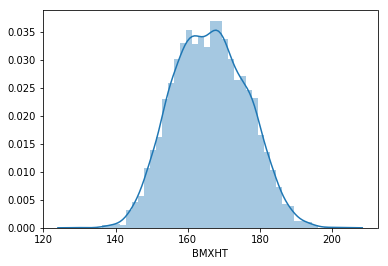

In [27]:
# insert your code here
sns.distplot(da.BMXHT.dropna())
plt.show()

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

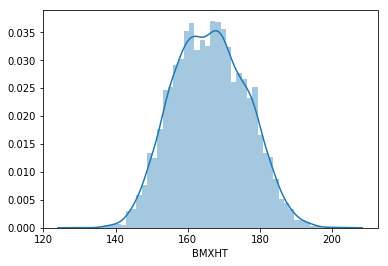

In [30]:
sns.distplot(da.BMXHT.dropna(),bins=50)
plt.show()

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

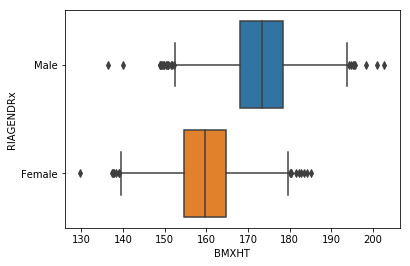

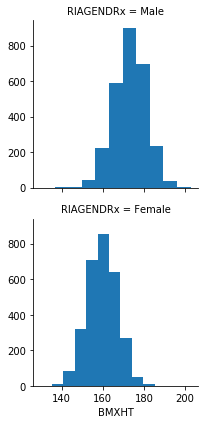

In [31]:
# insert your code here
sns.boxplot(x=da['BMXHT'],y=da['RIAGENDRx'])
g=sns.FacetGrid(da,row='RIAGENDRx')
g=g.map(plt.hist,'BMXHT')
plt.show()

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

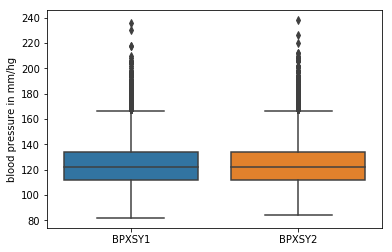

In [32]:
# insert your code her
bp=sns.boxplot(data=da.loc[:,['BPXSY1','BPXSY2']])
_=bp.set_ylabel("blood pressure in mm/hg")

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [ ]:
# insert your code here


__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

In [4]:
# insert your code here


__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [ ]:
# insert your code here

__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [7]:
# insert your code here

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [1]:
# insert your code here

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [ ]:
# insert your code here

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.